# Analisis de una sola acción - Versión estudiantes

## Instalar paquetes

In [ ]:

 #Instalar paquetes necesarios
!pip install yfinance
!pip install fix_yahoo_finance

# Importar paquete y nombrarlos de manera breve para facilitar su uso
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Restringir la aparición de warnings
import warnings
warnings.filterwarnings("ignore")

#Importar paquetes para descargar acciones
import fix_yahoo_finance as yf
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

## Descargar datos

In [ ]:
import yfinance as yf
# Seleccionar fecha de inicio y final
start_date = '2003-01-01'
end_date = '2023-01-01'
# Seleccionar acción. (utilizar ticker ampliamente utilizados)
ticker = 'KO'
# Descargar la informaciónn. La funcion de python está en el paquete "yf" y sus argumentos son ticker, fecha inicial y fecha final.
data = yf.download(ticker, start_date, end_date)
# Mostrar ultimas 5 observaciones (filas)
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2022-12-23  63.500000  63.869999  63.200001  63.820000  63.820000  6463300
2022-12-27  63.930000  64.290001  63.709999  64.209999  64.209999  7320700
2022-12-28  64.459999  64.650002  63.490002  63.570000  63.570000  7159400
2022-12-29  63.799999  64.150002  63.700001  63.950001  63.950001  7169300
2022-12-30  63.919998  63.919998  63.169998  63.610001  63.610001  7649400


## Grafica del precio

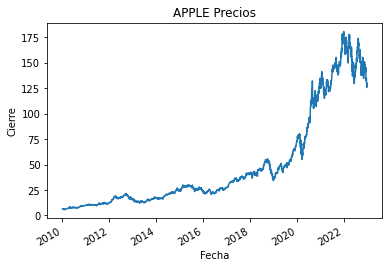

In [ ]:
#Realizar el plot del precio
# PREGUNTA: ¿Por qué utilizar la columna adjusted y no close?
data['Adj Close'].plot()
plt.xlabel("Fecha")
plt.ylabel("Cierre")
plt.title("Precios")
plt.show()

## Estimar retornos efectivos y logaritmicos

In [ ]:
# Encontrar retornos diarios y mensuales tanto efectivos como logaritmicos
daily_returns = data['Adj Close'].pct_change()
monthly_returns = data['Adj Close'].resample('M').ffill().pct_change()

#Retornos logaritmicos
daily_returns_ln = np.log(data['Adj Close'])-np.log(data['Adj Close'].shift(1)) #Recordemos que LN(A/B)=Ln(A)-Ln(B)
monthly_prices=data["Close"].asfreq('BM') #Obtenemos los dato del ultimo dia de cada mes
monthly_returns_ln = np.log(monthly_prices)-np.log(monthly_prices.shift(1))

In [ ]:
print(monthly_returns.tail())
print(monthly_returns_ln.tail())

Date
2022-08-31   -0.038336
2022-09-30   -0.085587
2022-10-31    0.068368
2022-11-30    0.070362
2022-12-31    0.000000
Freq: M, Name: Adj Close, dtype: float64
Date
2022-08-31   -0.039090
2022-09-30   -0.096737
2022-10-31    0.066133
2022-11-30    0.060929
2022-12-30    0.000000
Freq: BM, Name: Close, dtype: float64


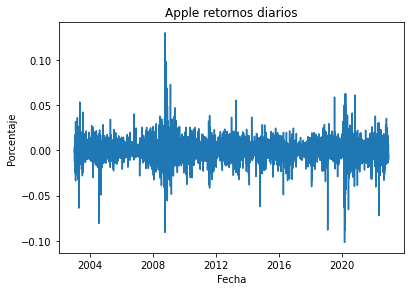

In [ ]:
#Graficar retornos diarios
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(daily_returns_ln) #Usamos los retornos logaritmicos
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Porcentaje")
ax1.set_title("Apple retornos diarios")
plt.show()

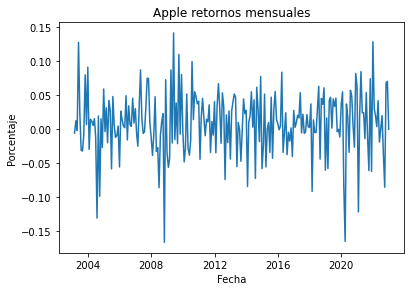

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(monthly_returns)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Porcentaje")
ax1.set_title("Apple retornos mensuales")
plt.show()

## Distribución de rentabilidades historicas

In [ ]:
(daily_returns_ln*100).describe()

count    5034.000000
mean        0.032354
std         1.173795
min       -10.172802
25%        -0.505303
50%         0.049201
75%         0.589206
max        12.997072
Name: Adj Close, dtype: float64

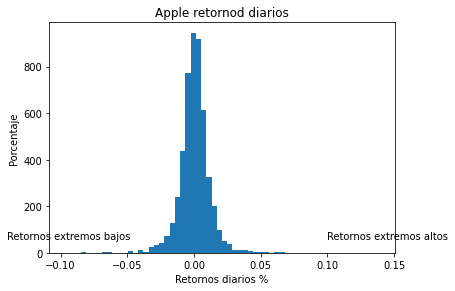

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Retornos diarios %")
ax1.set_ylabel("Porcentaje")
ax1.set_title("Retornos diarios")
ax1.text(-0.14,60,"Retornos extremos bajos")
ax1.text(0.10,60,"Retornos extremos altos")
plt.show()


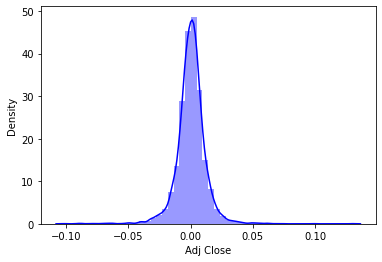

In [ ]:
sns.distplot(daily_returns_ln,bins=50,color="blue")

### ¿Se ajusta la distribución de rendimientos a una distribución gausseana (normal)?

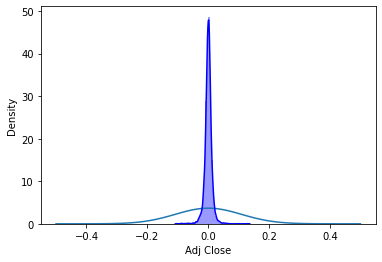

In [ ]:
# Graficar una distribución normal con los parametros encontrados en la nuestros datos
import math
mu =daily_returns.mean()
variance = daily_returns.std()
sigma = math.sqrt(variance)
x = np.linspace(-0.5,0.5)
set_title="Retornos diarios"
plt.plot(x, stats.norm.pdf(x, mu, sigma))

sns.distplot(daily_returns_ln, kde=True,color="blue")

plt.show()


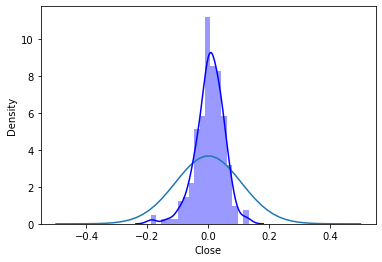

In [ ]:
import math
mu =daily_returns.mean()
variance = daily_returns.std()
sigma = math.sqrt(variance)
x = np.linspace(-0.5,0.5)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

sns.distplot(monthly_returns_ln, kde=True,color="blue")

plt.show()

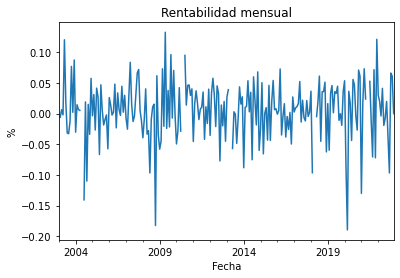

In [ ]:
monthly_returns_ln.plot()
plt.xlabel("Fecha")
plt.ylabel("%")
plt.title("Rentabilidad mensual")
plt.show()

In [ ]:
monthly_returns_ln.describe()

count    229.000000
mean       0.004893
std        0.047411
min       -0.189639
25%       -0.019971
50%        0.006942
75%        0.035786
max        0.132718
Name: Close, dtype: float64

In [ ]:
len(monthly_returns_ln)

240

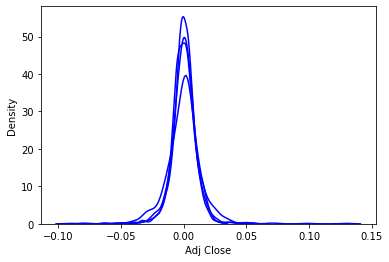

In [ ]:
t=5
for i in range(1,t):
  z=round(len(daily_returns_ln)/t)
  sns.distplot(daily_returns_ln[(z*i-z+1):(z*i)], kde=True,color="blue", hist=False)

In [ ]:
for i in range(1,t):
  z=round(len(daily_returns_ln)/t)
  print(z*i-z+1,z*i)

1 1007
1008 2014
2015 3021
3022 4028
